In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# confusion_matrix
from sklearn.metrics import confusion_matrix
# precision_recall_fscore_support
from sklearn.metrics import precision_recall_fscore_support
from sklearn.decomposition import PCA

In [2]:
def model_report(Y_test, Y_pred_rf):
    accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
    conf_matrix_rf = confusion_matrix(Y_test, Y_pred_rf)
    classification_rep = classification_report(Y_test, Y_pred_rf, zero_division=1)
    print(f"Model Accuracy: {accuracy_rf}")
    print("Confusion Matrix:")
    print(conf_matrix_rf)
    print("Classification Report:")
    print(classification_rep)

In [3]:
def model_confusion_matrix_heatmap(Y_test, Y_pred_rf):
    conf_matrix_rf = confusion_matrix(Y_test, Y_pred_rf)
    sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Random Forest Confusion Matrix')
    plt.show()

In [4]:
# remove outlier based on every column
def IQR(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    upper_fence = Q3 + IQR*1.5
    lower_fence = Q1 - IQR*1.5
    return upper_fence,lower_fence
def no_outlier(df):
    upper_fence, lower_fence = IQR(df)
    ddf=df[(df>lower_fence)&(df<upper_fence)]
    return ddf

In [5]:
def prfs(Y_test, Y_pred_rf):
    precision, recall, fscore, support = precision_recall_fscore_support(Y_test, Y_pred_rf, average='weighted', zero_division=1)
    print(f"precision: {precision}")
    print(f"recall: {recall}")
    print(f"fscore: {fscore}")
    print(f"support: {support}")

In [6]:
data = pd.read_csv("./old_data.csv")

In [7]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
# use label encoder to encode the categorical data if column type is object
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in data.columns:
    if data[col].dtype == 'object':
        data[col]=le.fit_transform(data[col])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int32
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int32
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

In [11]:
X = data.drop(['Education'], axis =1)
Y = data['Education']

# Split the Data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
print(x_train.shape)
print(x_test.shape)

(1176, 34)
(294, 34)


In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int32
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   EducationField            1470 non-null   int32
 7   EmployeeCount             1470 non-null   int64
 8   EmployeeNumber            1470 non-null   int64
 9   EnvironmentSatisfaction   1470 non-null   int64
 10  Gender                    1470 non-null   int32
 11  HourlyRate                1470 non-null   int64
 12  JobInvolvement            1470 non-null   int64
 13  JobLevel                  1470 non-null   int64
 14  JobRole                   1470 non-null 

In [13]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(x_train, y_train)
model_report(y_test, rf_classifier.predict(x_test))

Model Accuracy: 0.36054421768707484
Confusion Matrix:
[[ 1  0 18  3  0]
 [ 2  1 46 14  0]
 [ 5  1 84 28  0]
 [ 0  3 58 20  0]
 [ 0  0  4  6  0]]
Classification Report:
              precision    recall  f1-score   support

           1       0.12      0.05      0.07        22
           2       0.20      0.02      0.03        63
           3       0.40      0.71      0.51       118
           4       0.28      0.25      0.26        81
           5       1.00      0.00      0.00        10

    accuracy                           0.36       294
   macro avg       0.40      0.20      0.17       294
weighted avg       0.32      0.36      0.29       294



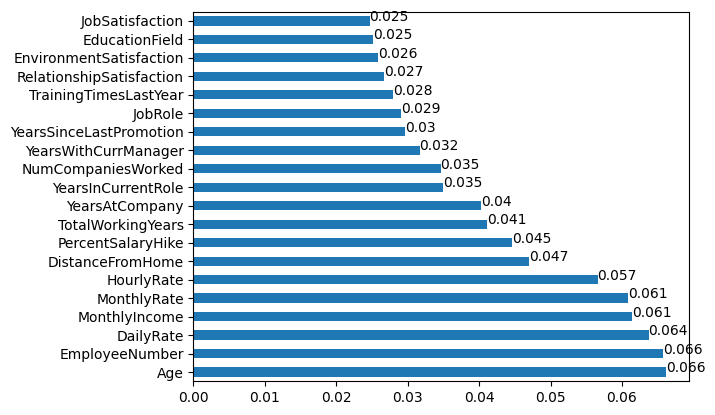

In [14]:
feat_importances = pd.Series(rf_classifier.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
# draw number on the bar
for index, value in enumerate(feat_importances.nlargest(20)):
    plt.text(value, index, str(round(value,3)))
plt.show()

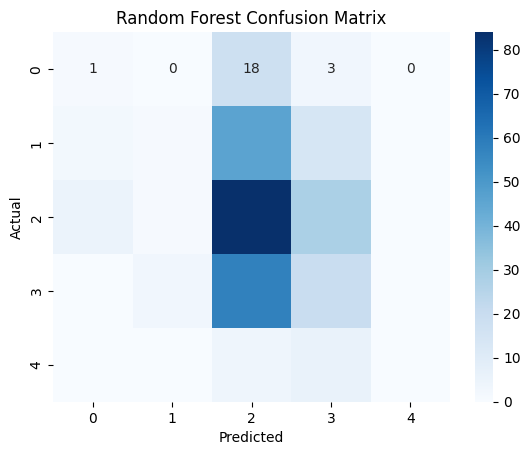

In [15]:
model_confusion_matrix_heatmap(y_test, rf_classifier.predict(x_test))

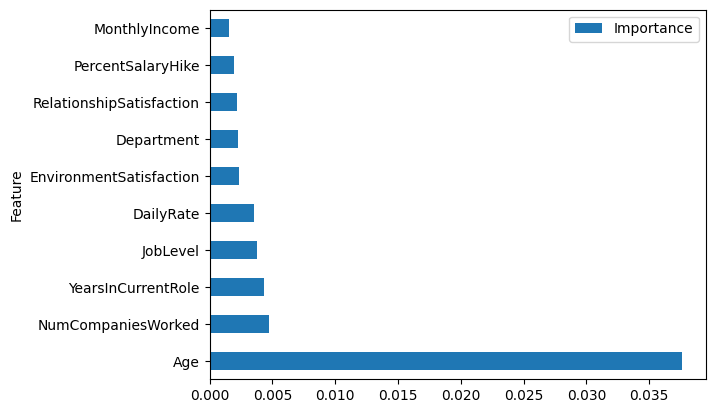

In [16]:
result = permutation_importance(rf_classifier, X, Y, n_repeats=10, random_state=0)
#feature_importance = dict(zip(X.columns, result.importances_mean))
permutation_importance_result = pd.DataFrame({'Feature': X.columns, 'Importance': result.importances_mean})
permutation_importance_result.sort_values(by='Importance', ascending=False)
# draw graph of feature importances for better visualization
permutation_importance_result.sort_values(by='Importance', ascending=False).head(10).plot(kind='barh', x='Feature', y='Importance')
plt.show()


In [18]:
data['Education'].value_counts()

Education
3    572
4    398
2    282
1    170
5     48
Name: count, dtype: int64

In [19]:
imp = pd.DataFrame(feat_importances, columns=['importance'])
imp = imp[imp['importance'] > 0.05]
imp

,importance
Age,0.066146
DailyRate,0.063730
EmployeeNumber,0.065768
HourlyRate,0.056591
MonthlyIncome,0.061462
MonthlyRate,0.060842


In [20]:
x_train_copy = x_train.copy()
y_train_copy = y_train.copy()
x_test_copy = x_test.copy()
y_test_copy = y_test.copy()
x_train_copy = x_train_copy[x_train_copy.columns.intersection(imp.index)]
x_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1176 entries, 1097 to 1126
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             1176 non-null   int64
 1   DailyRate       1176 non-null   int64
 2   EmployeeNumber  1176 non-null   int64
 3   HourlyRate      1176 non-null   int64
 4   MonthlyIncome   1176 non-null   int64
 5   MonthlyRate     1176 non-null   int64
dtypes: int64(6)
memory usage: 64.3 KB


### Plot training data in 3D

In [21]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x_train_copy)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principalDf.tail(3)

,principal component 1,principal component 2,principal component 3
1173,-10221.955911,-3123.762810,145.863906
1174,9266.243412,-2730.293817,963.142020
1175,5719.808629,12728.208771,622.215714


In [22]:
fig = px.scatter_3d(principalDf, x='principal component 1', y='principal component 2', z='principal component 3', color=y_train_copy,
                    labels={'principal component 1': 'Principal Component 1', 'principal component 2': 'Principal Component 2',
                            'principal component 3': 'Principal Component 3'}, title='3 component PCA')
fig.show()

In [24]:
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train-1)
model_report(y_test, xgb_model.predict(x_test))

Model Accuracy: 0.23129251700680273
Confusion Matrix:
[[ 0  0  0  0  0  0]
 [ 7  0  9  6  0  0]
 [ 3  4 36 20  0  0]
 [ 8 14 64 31  1  0]
 [ 4 13 40 23  1  0]
 [ 0  0  5  5  0  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      1.00      0.00         0
           1       0.00      0.00      1.00        22
           2       0.23      0.57      0.33        63
           3       0.36      0.26      0.31       118
           4       0.50      0.01      0.02        81
           5       1.00      0.00      0.00        10

    accuracy                           0.23       294
   macro avg       0.35      0.31      0.28       294
weighted avg       0.37      0.23      0.28       294

